# Exploratory Data Analysis

## Import Requisite Libraries

In [1]:
########################### Import Requisite Libraries #########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pprint
import warnings
import textwrap

################################################################################
# Add the parent directory to sys.path to access 'functions.py'
sys.path.append(os.path.join(os.pardir))
from py_scripts.functions import *
from py_scripts.esrd_functions import *

################################################################################
print("Python version:")
print(sys.version)
print()
print(f"Pandas Version = {pd.__version__}")
print(f"Seaborn Version = {sns.__version__}")
print(f"Numpy Version = {np.__version__}")

Python version:
3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]

Pandas Version = 2.2.2
Seaborn Version = 0.13.2
Numpy Version = 1.26.4


## Set Paths

In [2]:
base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to the parent directory, then into the 'data' folder
data_path = os.path.join(os.pardir, "data")
data_output = os.path.join(os.pardir, "data_output")

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
ensure_directory(data_path)
ensure_directory(data_output)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

# Read the file into a DataFrame
df_eda = pd.read_excel(os.path.join(data_path, "KFRE.xlsx"))

Directory exists: ..\data
Directory exists: ..\data_output
Directory exists: ..\images\png_images
Directory exists: ..\images\svg_images


In [3]:
df_eda.head()  # inspect first 5 rows of data

,Age,SEX,HTN,DM,GFR,uACR,ACR,Ca,P,Alb,TCO2,ESRD,ESRD_dur
0,61,1,1,0,9.148234,10.0,10.000000,6.0,4.0,2.6,16.0,0,2086
1,30,0,1,1,153.974871,29.0,29.000000,9.4,4.5,4.0,24.0,0,2357
2,55,1,0,0,66.810414,NaN,25.774259,9.2,1.6,4.3,18.0,0,265
3,35,1,0,0,89.347060,NaN,28.451303,10.5,2.9,5.0,26.0,0,700
4,66,1,1,0,7.316171,0.0,0.000000,7.7,6.5,3.5,14.0,1,3


## Preprocessing

### Create Randomized Patient IDs for Indexing

Generating randomized patient IDs for indexing is crucial for several reasons:

1. **Privacy and Anonymity**: Random patient IDs help protect patient privacy and maintain anonymity. This is particularly important in healthcare research to ensure compliance with data protection regulations such as HIPAA.

2. **Avoiding Bias**: Randomly generated IDs prevent any unintentional bias that could be introduced by using sequential or otherwise patterned IDs. This ensures that analyses are not influenced by the ordering of data.

3. **Data Integrity**: Using random IDs can help maintain data integrity when merging datasets from different sources. It reduces the risk of conflicts or duplicates that could arise from overlapping or sequential IDs.

4. **Scalability**: Random IDs make it easier to scale the dataset as new patient records can be added without worrying about maintaining a specific order or sequence.

By using random patient IDs, we can enhance the robustness, security, and scalability of our data management processes.


In [4]:
df_eda = add_ids(df_eda, column_name="Patient_ID", seed=222)

In [5]:
df_eda.head()  # inspect first 5 rows of data

,Age,SEX,HTN,DM,GFR,uACR,ACR,Ca,P,Alb,TCO2,ESRD,ESRD_dur
Patient_ID,,,,,,,,,,,,,
723027400,61,1,1,0,9.148234,10.0,10.000000,6.0,4.0,2.6,16.0,0,2086
904532344,30,0,1,1,153.974871,29.0,29.000000,9.4,4.5,4.0,24.0,0,2357
890205650,55,1,0,0,66.810414,NaN,25.774259,9.2,1.6,4.3,18.0,0,265
317865962,35,1,0,0,89.347060,NaN,28.451303,10.5,2.9,5.0,26.0,0,700
968356501,66,1,1,0,7.316171,0.0,0.000000,7.7,6.5,3.5,14.0,1,3


### Inspect Data Types

In [6]:
dataframe_columns(df_eda)

Shape:  (16619, 13) 



,column,dtype,null_total,null_pct,unique_values_total,max_unique_value,max_unique_value_total,max_unique_value_pct
0,Age,int64,0,0.00,79,65,417,2.51
1,SEX,int64,0,0.00,2,1,13168,79.23
2,HTN,int64,0,0.00,2,0,10558,63.53
3,DM,int64,0,0.00,2,0,11599,69.79
4,GFR,float64,0,0.00,7065,79.2172495121634,46,0.28
5,uACR,float64,8736,52.57,2298,nan,8736,52.57
6,ACR,float64,0,0.00,10633,5.0,246,1.48
7,Ca,float64,0,0.00,80,9.3,1345,8.09
8,P,float64,0,0.00,106,3.4,1113,6.70
9,Alb,float64,0,0.00,50,4.3,1590,9.57


In [7]:
df_eda = df_eda.drop(columns=["uACR"])  # uACR redundant feat; use ACR instead

In [8]:
# categorize sex s/t it can later be used inside kfre function
df_eda["sex_cat"] = df_eda["SEX"].map({1: "Male", 0: "Female"})

### Convert days to years

Tangri et al. used years to determine outcome for `2-years`, and `5-years`, respectively, so we will have to convert days to years.   
The `calculate_outcome()` function below creates a new column called years that converts `ESRD_dur`.   
Now we use the years column to classify the `ESRD` column into two new columns inside df called `2_year_outcome` and `5_year_outcome` given the constrains above.

In [9]:
df_eda = calculate_outcome(
    df=df_eda,
    col="ESRD",
    years=2,
    duration_col="ESRD_dur",
    prefix="ESRD_in",
)


df_eda = calculate_outcome(
    df=df_eda,
    col="ESRD",
    years=5,
    duration_col="ESRD_dur",
    prefix="ESRD_in",
)

### CKD Stages 3 - 5 

Classify the `GFR` column into CKD Stages 3 through 5 (breaking stage 3 down into 3a and 3b) and cast the results into a separate column called `ckd_stages`.


In [10]:
df_eda = classify_ckd_stages(
    df=df_eda,
    egfr_col="GFR",
    stage_col="ckd_stage",
    combined_stage_col="CKD Stage 3 - 5",
)

## Descriptive Statistics

In [11]:
df_eda["ckd_stage"].value_counts()

ckd_stage
CKD Stage 2     6788
CKD Stage 1     3262
CKD Stage 3a    2707
CKD Stage 3b    1720
CKD Stage 4     1226
CKD Stage 5      916
Name: count, dtype: int64

In [12]:
df_hist = df_eda[["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]].describe()
dist_list = df_hist.columns.to_list()
df_hist

,Age,GFR,ACR,Ca,P,Alb,TCO2,ESRD_dur
count,16619.000000,16619.000000,16619.000000,16619.000000,16619.000000,16619.000000,16619.000000,16619.000000
mean,54.434382,66.700761,727.428603,9.140177,3.624869,4.035508,26.133648,1385.878573
std,17.243192,31.130722,1760.782486,0.665668,0.841081,0.605782,3.993305,1444.116703
min,18.000000,2.237831,0.000000,3.500000,0.000000,0.300000,3.000000,1.000000
25%,43.000000,46.939291,25.284377,8.800000,3.100000,3.800000,24.000000,241.000000
50%,57.000000,67.842375,120.860168,9.200000,3.500000,4.200000,27.000000,868.000000
75%,68.000000,85.128911,642.000000,9.600000,4.000000,4.400000,29.000000,2091.500000
max,97.000000,415.044533,60323.438855,14.800000,15.500000,5.700000,59.000000,5892.000000


### Count Distributions

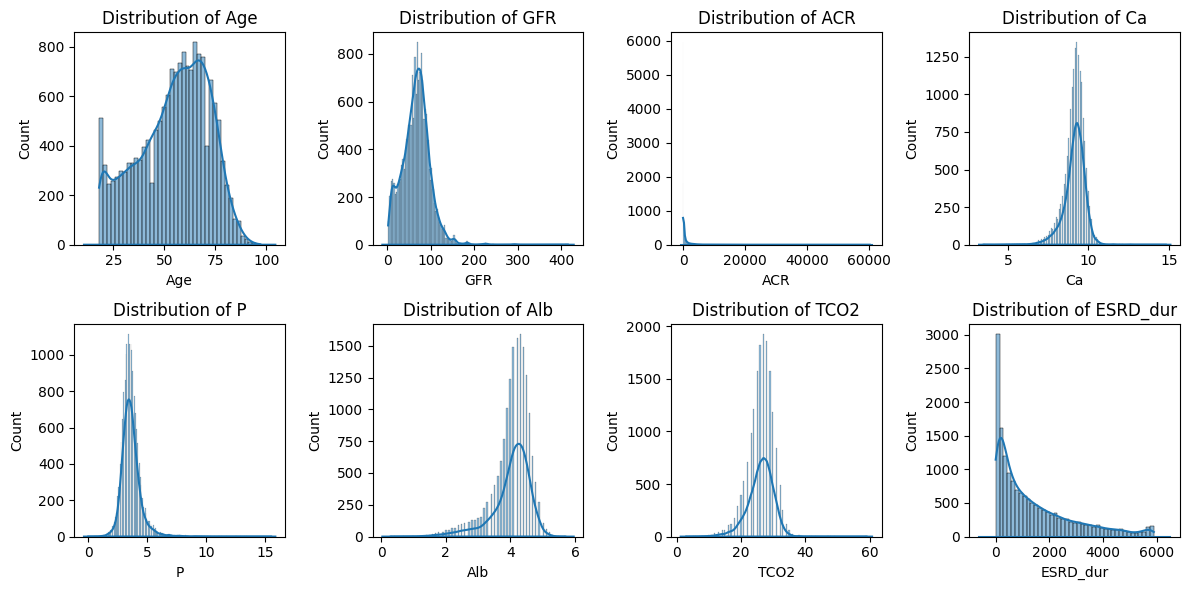

In [13]:
vars_of_interest = ["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
kde_distributions(
    df=df_eda,
    dist_list=dist_list,
    x=12,
    y=6,
    kde=True,
    n_rows=2,
    n_cols=4,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="count_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,  # List of variables of interest
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    single_var_image_filename="count_single_distribution",
    y_axis="count",
    plot_type="both",
)

### Density Distributions

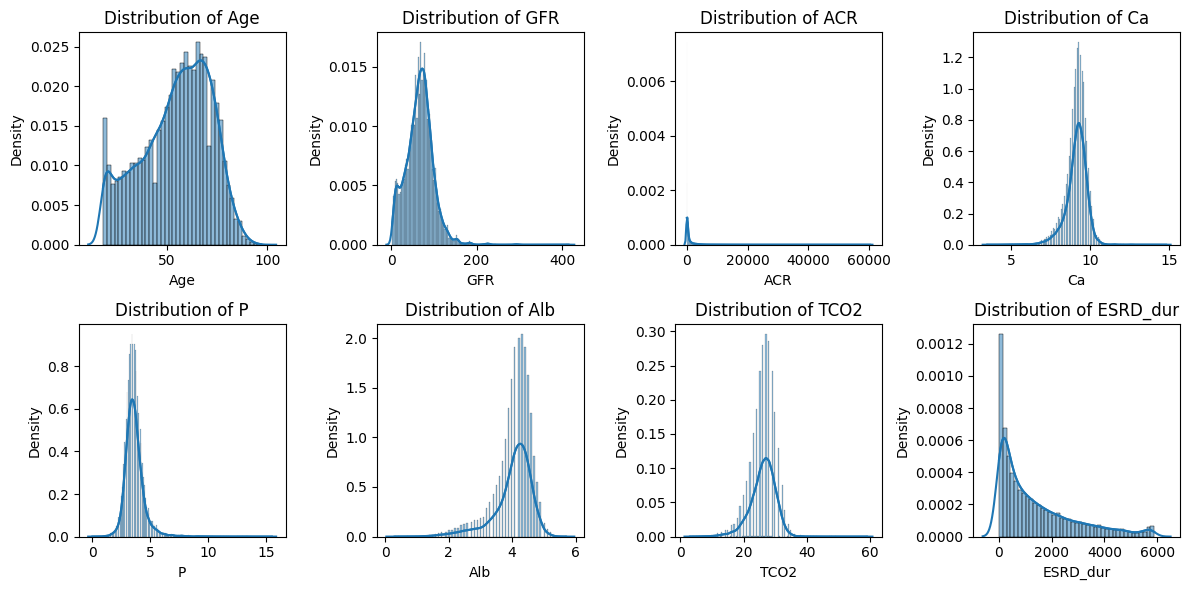

In [14]:
vars_of_interest = ["Age", "GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
kde_distributions(
    df=df_eda,
    dist_list=dist_list,
    x=12,
    y=6,
    kde=True,
    n_rows=2,
    n_cols=4,
    w_pad=1.0,
    h_pad=1.0,
    text_wrap=50,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    image_filename="kde_density_distributions",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,  # List of variables of interest
    single_var_image_path_png=image_path_png,
    single_var_image_path_svg=image_path_svg,
    single_var_image_filename="kde_density_single_distribution",
    y_axis="density",
    plot_type="both",
)

## Age-Related Distributions

In [15]:
# create age bins so that the ages can be categorized
bin_ages = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100, float("inf")]
label_ages = [
    "< 18",
    "18-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100 +",
]

# categorize the ages and assign to new var
df_eda["Age_Group"] = pd.cut(
    df_eda["Age"], bins=bin_ages, labels=label_ages, right=False
)

### ESRD Outcomes by Age Group

In [16]:
esrd_by_age = contingency_table(
    df=df_eda,
    col1="Age_Group",
    col2="ESRD",
    SortBy="Group",
)
esrd_by_age

,Age_Group,ESRD,GroupTotal,GroupPct
0,18-29,0,1723,10.37
1,18-29,1,181,1.09
2,30-39,0,1419,8.54
3,30-39,1,227,1.37
4,40-49,0,1919,11.55
5,40-49,1,396,2.38
6,50-59,0,2820,16.97
7,50-59,1,593,3.57
8,60-69,0,3223,19.39
9,60-69,1,589,3.54


In [17]:
ckd_by_age = contingency_table(
    df=df_eda,
    col1="Age_Group",
    col2="ckd_stage",
    SortBy="Group",
)
ckd_by_age

,Age_Group,ckd_stage,GroupTotal,GroupPct
0,18-29,CKD Stage 1,1165,7.01
1,18-29,CKD Stage 2,467,2.81
2,18-29,CKD Stage 3a,74,0.45
3,18-29,CKD Stage 3b,68,0.41
4,18-29,CKD Stage 4,66,0.40
5,18-29,CKD Stage 5,64,0.39
6,30-39,CKD Stage 1,488,2.94
7,30-39,CKD Stage 2,703,4.23
8,30-39,CKD Stage 3a,131,0.79
9,30-39,CKD Stage 3b,99,0.60


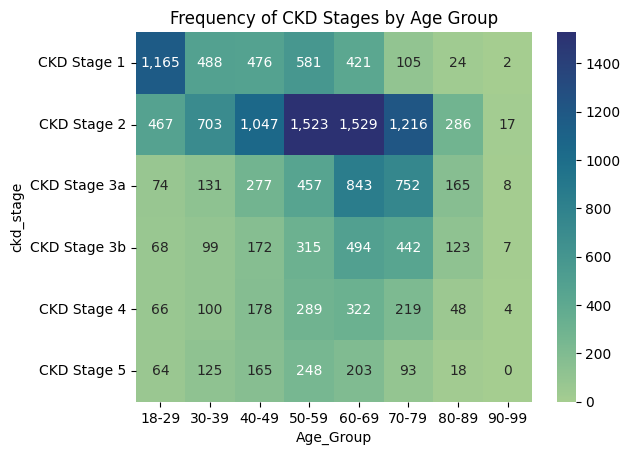

In [18]:
sns.heatmap(
    pd.crosstab(df_eda["ckd_stage"], df_eda["Age_Group"]),
    annot=True,
    fmt=",d",
    cmap="crest",
)
plt.title("Frequency of CKD Stages by Age Group")
plt.savefig(os.path.join(image_path_png, "freq_ckd_age.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_path_svg, "freq_ckd_age.svg"), bbox_inches="tight")
plt.show()

In [19]:
df_eda["ckd_stage"].unique()

array(['CKD Stage 5', 'CKD Stage 1', 'CKD Stage 2', 'CKD Stage 3b',
       'CKD Stage 4', 'CKD Stage 3a'], dtype=object)

In [20]:
# List to store the columns used
func_col_used = [
    "HTN",
    "DM",
    "SEX",
    "ESRD_in_2_year_outcome",
    "ESRD_in_5_year_outcome",
    "ckd_stage",
]

# Define the func_col to use in the loop
func_col = [
    "HTN",
    "DM",
    "SEX",
    "ESRD_in_2_year_outcome",
    "ESRD_in_5_year_outcome",
    "ckd_stage",
]


# Define the legend_labels to use in the loop
legend_labels_list = [
    ["No Hypertension", "Hypertension"],
    ["No Diabetes", "Diabetes"],
    ["Male", "Female"],
    ["No_ESRD", "ESRD"],
    ["No_ESRD", "ESRD"],
    [
        "CKD Stage 1",
        "CKD Stage 2",
        "CKD Stage 3a",
        "CKD Stage 3b",
        "CKD Stage 4",
        "CKD Stage 5",
    ],
]

# Define titles for the plots
title = [
    "Hypertension",
    "Diabetes",
    "SEX",
    "ESRD_in_2_year_outcome",
    "ESRD_in_5_year_outcome",
    "ckd_stage",
]

In [21]:
df_eda["ckd_stage"].nunique()

6

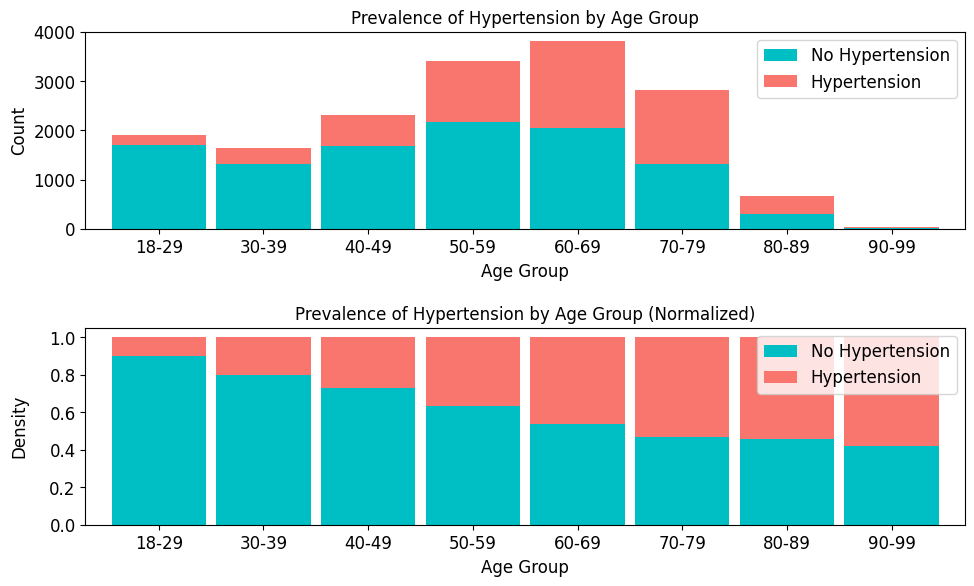

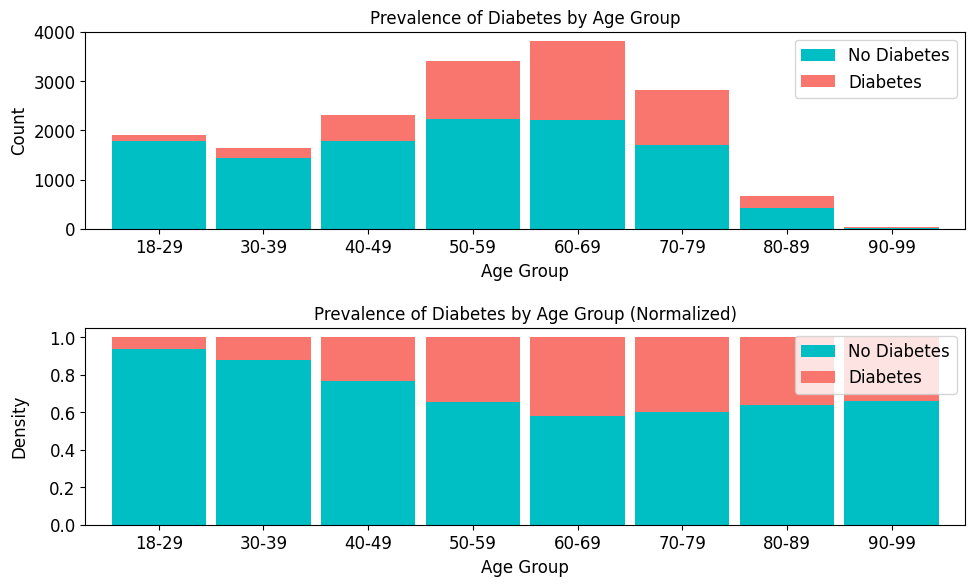

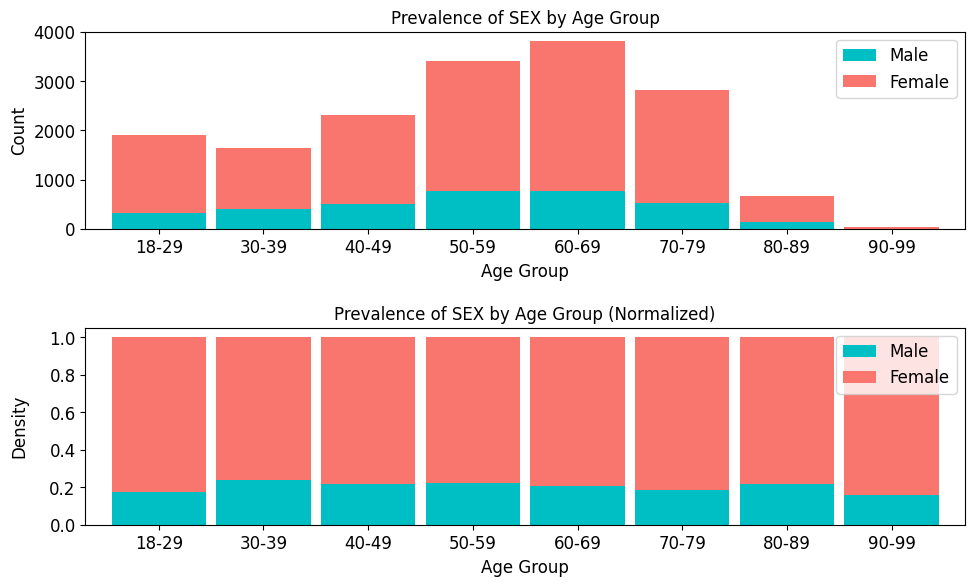

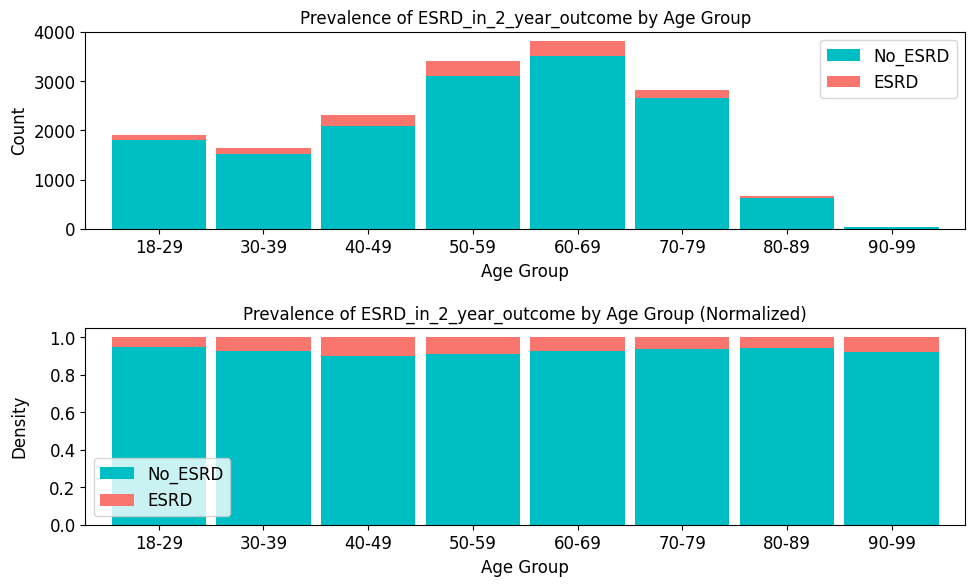

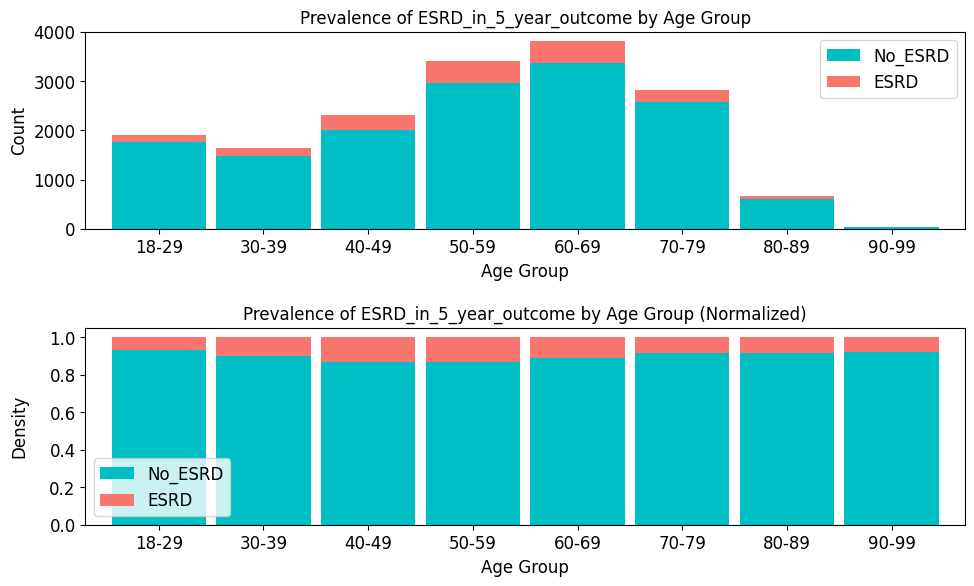

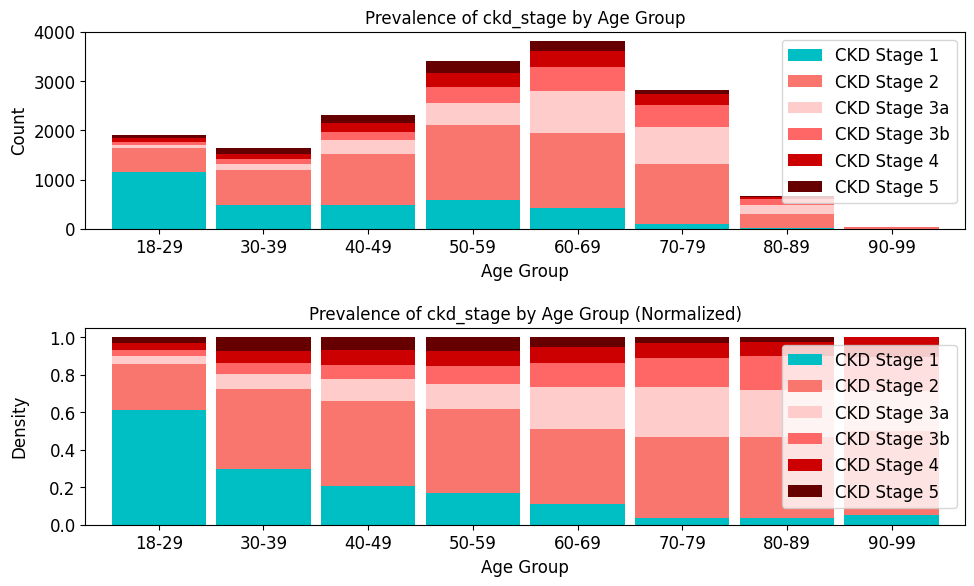

Crosstab for HTN


HTN,No Hypertension,Hypertension,Total,No Hypertension_%,Hypertension_%
Age_Group,,,,,
18-29,1711,193,1904,89.86,10.14
30-39,1311,335,1646,79.65,20.35
40-49,1682,633,2315,72.66,27.34
50-59,2166,1247,3413,63.46,36.54
60-69,2046,1766,3812,53.67,46.33
70-79,1322,1505,2827,46.76,53.24
80-89,304,360,664,45.78,54.22
90-99,16,22,38,42.11,57.89
Total,10558,6061,16619,63.53,36.47


Crosstab for DM


DM,No Diabetes,Diabetes,Total,No Diabetes_%,Diabetes_%
Age_Group,,,,,
18-29,1785,119,1904,93.75,6.25
30-39,1444,202,1646,87.73,12.27
40-49,1776,539,2315,76.72,23.28
50-59,2235,1178,3413,65.48,34.52
60-69,2216,1596,3812,58.13,41.87
70-79,1695,1132,2827,59.96,40.04
80-89,423,241,664,63.70,36.30
90-99,25,13,38,65.79,34.21
Total,11599,5020,16619,69.79,30.21


Crosstab for SEX


SEX,Male,Female,Total,Male_%,Female_%
Age_Group,,,,,
18-29,328,1576,1904,17.23,82.77
30-39,396,1250,1646,24.06,75.94
40-49,508,1807,2315,21.94,78.06
50-59,764,2649,3413,22.38,77.62
60-69,779,3033,3812,20.44,79.56
70-79,527,2300,2827,18.64,81.36
80-89,143,521,664,21.54,78.46
90-99,6,32,38,15.79,84.21
Total,3451,13168,16619,20.77,79.23


Crosstab for ESRD_in_2_year_outcome


ESRD_in_2_year_outcome,No_ESRD,ESRD,Total,No_ESRD_%,ESRD_%
Age_Group,,,,,
18-29,1806,98,1904,94.85,5.15
30-39,1519,127,1646,92.28,7.72
40-49,2085,230,2315,90.06,9.94
50-59,3096,317,3413,90.71,9.29
60-69,3519,293,3812,92.31,7.69
70-79,2653,174,2827,93.85,6.15
80-89,624,40,664,93.98,6.02
90-99,35,3,38,92.11,7.89
Total,15337,1282,16619,92.29,7.71


Crosstab for ESRD_in_5_year_outcome


ESRD_in_5_year_outcome,No_ESRD,ESRD,Total,No_ESRD_%,ESRD_%
Age_Group,,,,,
18-29,1772,132,1904,93.07,6.93
30-39,1477,169,1646,89.73,10.27
40-49,2007,308,2315,86.70,13.30
50-59,2954,459,3413,86.55,13.45
60-69,3375,437,3812,88.54,11.46
70-79,2579,248,2827,91.23,8.77
80-89,608,56,664,91.57,8.43
90-99,35,3,38,92.11,7.89
Total,14807,1812,16619,89.10,10.90


Crosstab for ckd_stage


ckd_stage,CKD Stage 1,CKD Stage 2,CKD Stage 3a,CKD Stage 3b,CKD Stage 4,CKD Stage 5,Total,CKD Stage 1_%,CKD Stage 2_%,CKD Stage 3a_%,CKD Stage 3b_%,CKD Stage 4_%,CKD Stage 5_%
Age_Group,,,,,,,,,,,,,
18-29,1165,467,74,68,66,64,1904,61.19,24.53,3.89,3.57,3.47,3.36
30-39,488,703,131,99,100,125,1646,29.65,42.71,7.96,6.01,6.08,7.59
40-49,476,1047,277,172,178,165,2315,20.56,45.23,11.97,7.43,7.69,7.13
50-59,581,1523,457,315,289,248,3413,17.02,44.62,13.39,9.23,8.47,7.27
60-69,421,1529,843,494,322,203,3812,11.04,40.11,22.11,12.96,8.45,5.33
70-79,105,1216,752,442,219,93,2827,3.71,43.01,26.60,15.63,7.75,3.29
80-89,24,286,165,123,48,18,664,3.61,43.07,24.85,18.52,7.23,2.71
90-99,2,17,8,7,4,0,38,5.26,44.74,21.05,18.42,10.53,0.00
Total,3262,6788,2707,1720,1226,916,16619,19.63,40.84,16.29,10.35,7.38,5.51


In [22]:
crosstabs_dict = stacked_crosstab_plot(
    x=12,
    y=8,
    p=10,
    df=df_eda,
    col="Age_Group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Stacked_Bar_Age",  # Prefix for the filename
    kind="bar",
    width=0.9,
    rot=0,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_formats=["png", "svg"],
    color=["#00BFC4", "#F8766D", "#FFCCCC", "#FF6666", "#CC0000", "#660000"],
    output="both",  # Change this to "plots_only", "crosstabs_only", or "both"
    return_dict=True,  # Do not return the dictionary
)

In [23]:
# Extract the crosstab for a specific variable

crosstab_htn_age = crosstabs_dict["HTN"]
crosstab_htn_age = crosstabs_dict["DM"]
crosstab_sex_age = crosstabs_dict["SEX"]
crosstab_esrd_2_year_age = crosstabs_dict["ESRD_in_2_year_outcome"]
crosstab_esrd_5_year_age = crosstabs_dict["ESRD_in_5_year_outcome"]
crosstab_ckd_stage_age = crosstabs_dict["ckd_stage"]

### Comprehensive Age-Related Boxplots for Continuous Values

In [24]:
age_boxplot_list = df_eda[
    ["GFR", "ACR", "Ca", "P", "Alb", "TCO2", "ESRD_dur"]
].columns.to_list()

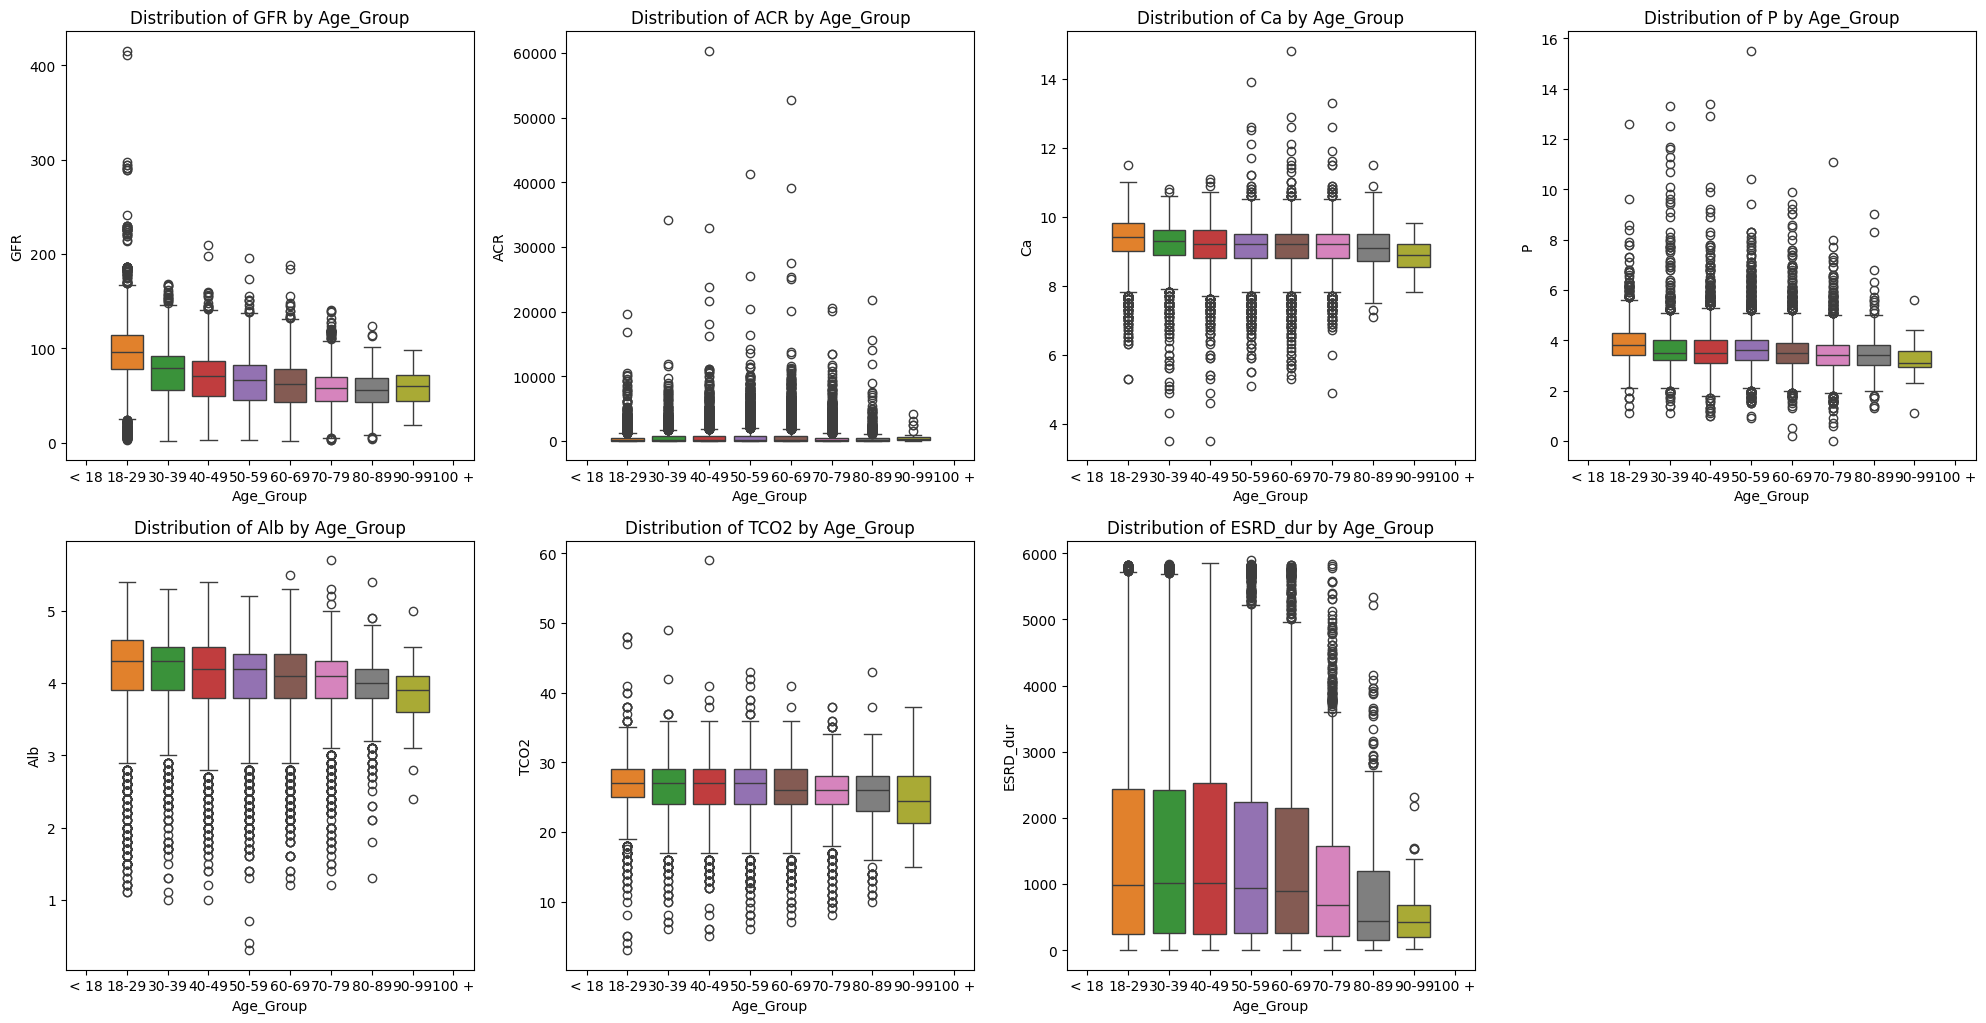

In [25]:
metrics_boxplot_comp = ["Age_Group"]

metrics_box_violin(
    df=df_eda,
    metrics_list=age_boxplot_list,
    metrics_boxplot_comp=metrics_boxplot_comp,
    n_rows=3,
    n_cols=4,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_both=True,
    show_plot="grid",
    individual_figsize=(10, 8),
)

## CKD Stage Related Distributions

In [26]:
# removing ckd_stages from functional columns because already for ckd_stages
func_col_ckd_stages = func_col.copy()
func_col_ckd_stages.remove("ckd_stage")

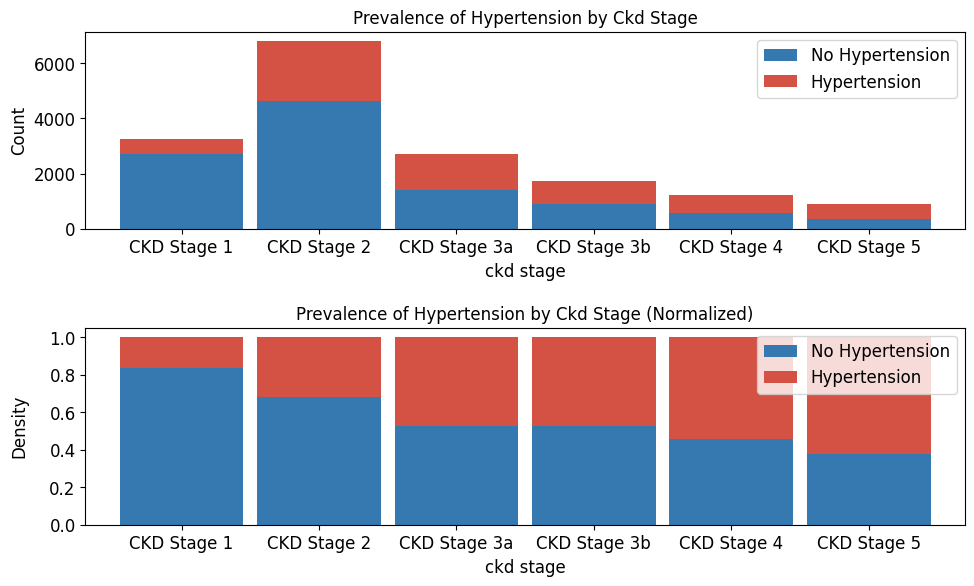

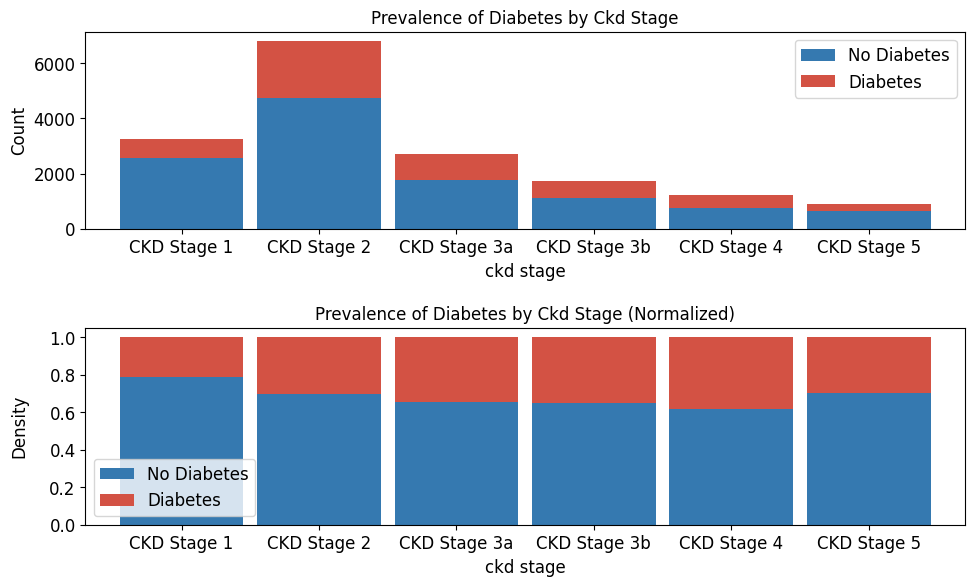

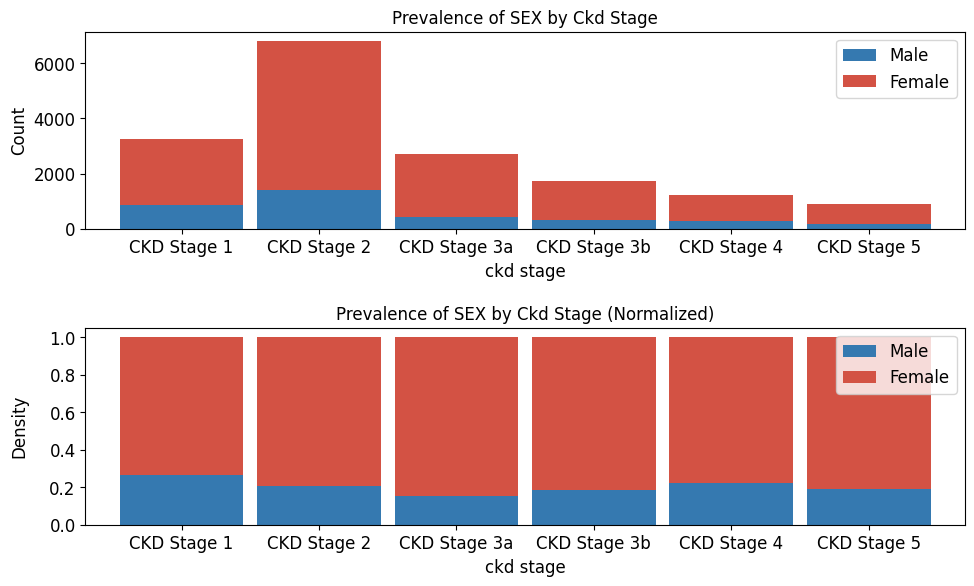

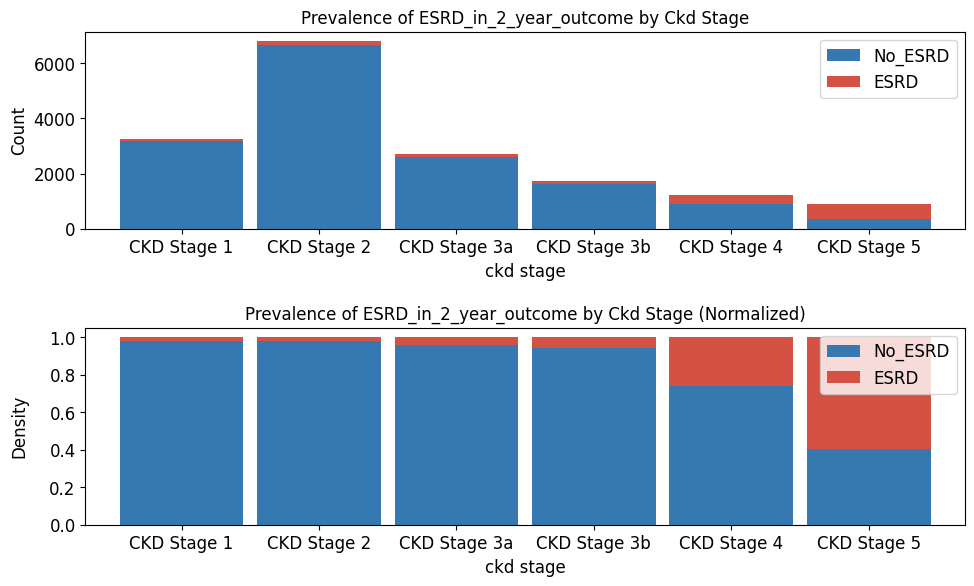

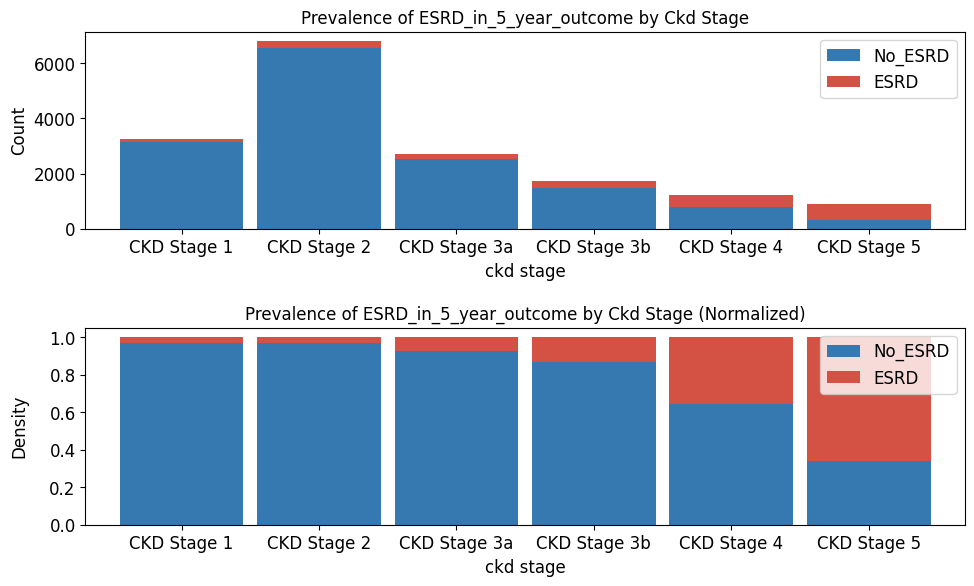

Crosstab for HTN


HTN,No Hypertension,Hypertension,Total,No Hypertension_%,Hypertension_%
ckd_stage,,,,,
CKD Stage 1,2715,547,3262,83.23,16.77
CKD Stage 2,4610,2178,6788,67.91,32.09
CKD Stage 3a,1423,1284,2707,52.57,47.43
CKD Stage 3b,906,814,1720,52.67,47.33
CKD Stage 4,557,669,1226,45.43,54.57
CKD Stage 5,347,569,916,37.88,62.12
Total,10558,6061,16619,63.53,36.47


Crosstab for DM


DM,No Diabetes,Diabetes,Total,No Diabetes_%,Diabetes_%
ckd_stage,,,,,
CKD Stage 1,2571,691,3262,78.82,21.18
CKD Stage 2,4740,2048,6788,69.83,30.17
CKD Stage 3a,1776,931,2707,65.61,34.39
CKD Stage 3b,1114,606,1720,64.77,35.23
CKD Stage 4,757,469,1226,61.75,38.25
CKD Stage 5,641,275,916,69.98,30.02
Total,11599,5020,16619,69.79,30.21


Crosstab for SEX


SEX,Male,Female,Total,Male_%,Female_%
ckd_stage,,,,,
CKD Stage 1,856,2406,3262,26.24,73.76
CKD Stage 2,1413,5375,6788,20.82,79.18
CKD Stage 3a,412,2295,2707,15.22,84.78
CKD Stage 3b,322,1398,1720,18.72,81.28
CKD Stage 4,275,951,1226,22.43,77.57
CKD Stage 5,173,743,916,18.89,81.11
Total,3451,13168,16619,20.77,79.23


Crosstab for ESRD_in_2_year_outcome


ESRD_in_2_year_outcome,No_ESRD,ESRD,Total,No_ESRD_%,ESRD_%
ckd_stage,,,,,
CKD Stage 1,3194,68,3262,97.92,2.08
CKD Stage 2,6656,132,6788,98.06,1.94
CKD Stage 3a,2597,110,2707,95.94,4.06
CKD Stage 3b,1619,101,1720,94.13,5.87
CKD Stage 4,904,322,1226,73.74,26.26
CKD Stage 5,367,549,916,40.07,59.93
Total,15337,1282,16619,92.29,7.71


Crosstab for ESRD_in_5_year_outcome


ESRD_in_5_year_outcome,No_ESRD,ESRD,Total,No_ESRD_%,ESRD_%
ckd_stage,,,,,
CKD Stage 1,3154,108,3262,96.69,3.31
CKD Stage 2,6555,233,6788,96.57,3.43
CKD Stage 3a,2509,198,2707,92.69,7.31
CKD Stage 3b,1493,227,1720,86.80,13.20
CKD Stage 4,785,441,1226,64.03,35.97
CKD Stage 5,311,605,916,33.95,66.05
Total,14807,1812,16619,89.10,10.90


In [27]:
crosstabs_dict = stacked_crosstab_plot(
    x=12,
    y=8,
    p=10,
    df=df_eda,
    col="ckd_stage",
    func_col=func_col_ckd_stages,
    legend_labels_list=legend_labels_list,
    title=title,
    file_prefix="Stacked_Bar_CKD",  # Prefix for the filename
    kind="bar",
    width=0.9,
    rot=0,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_formats=["png", "svg"],
    color=["#3579B0", "#D35244"],
    output="both",  # Change this to "plots_only", "crosstabs_only", or "both"
    return_dict=True,  # Do not return the dictionary
)

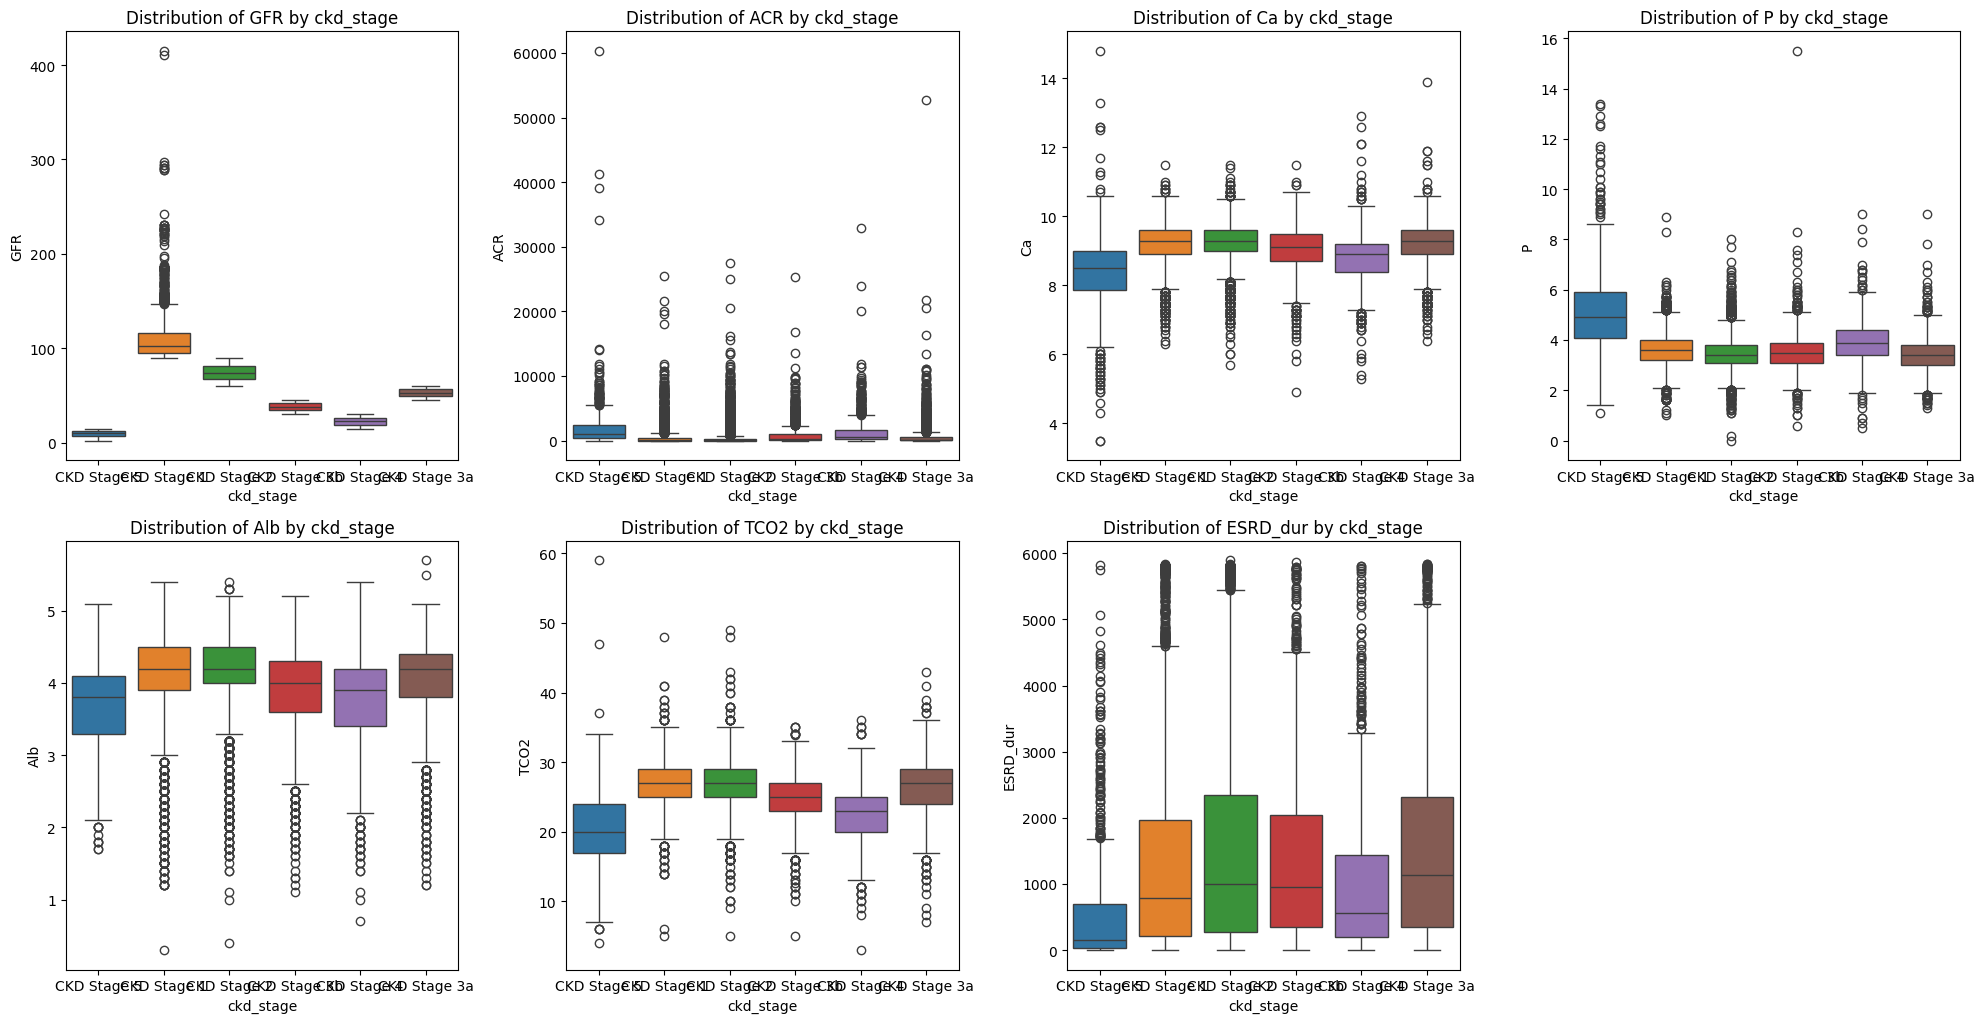

In [28]:
metrics_boxplot_comp = ["ckd_stage"]

metrics_box_violin(
    df=df_eda,
    metrics_list=age_boxplot_list,
    metrics_boxplot_comp=metrics_boxplot_comp,
    n_rows=3,
    n_cols=4,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_both=True,
    show_plot="grid",
    individual_figsize=(10, 8),
)

## Summarize All Possible Combinations of Age, Sex, Diabetes and Hypertension

In [29]:
df_eda

,Age,SEX,HTN,DM,GFR,ACR,Ca,P,Alb,TCO2,ESRD,ESRD_dur,sex_cat,years,ESRD_in_2_year_outcome,ESRD_in_5_year_outcome,ckd_stage,CKD Stage 3 - 5,Age_Group
Patient_ID,,,,,,,,,,,,,,,,,,,
723027400,61,1,1,0,9.148234,10.000000,6.0,4.0,2.6,16.0,0,2086,Male,6.0,0,0,CKD Stage 5,CKD Stage 3 - 5,60-69
904532344,30,0,1,1,153.974871,29.000000,9.4,4.5,4.0,24.0,0,2357,Female,6.0,0,0,CKD Stage 1,Not classified,30-39
890205650,55,1,0,0,66.810414,25.774259,9.2,1.6,4.3,18.0,0,265,Male,1.0,0,0,CKD Stage 2,Not classified,50-59
317865962,35,1,0,0,89.347060,28.451303,10.5,2.9,5.0,26.0,0,700,Male,2.0,0,0,CKD Stage 2,Not classified,30-39
968356501,66,1,1,0,7.316171,0.000000,7.7,6.5,3.5,14.0,1,3,Male,0.0,1,1,CKD Stage 5,CKD Stage 3 - 5,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933415493,61,1,1,1,43.700000,3754.969281,8.5,4.1,3.4,26.0,0,196,Male,1.0,0,0,CKD Stage 3b,CKD Stage 3 - 5,60-69
256002754,48,1,1,1,31.600000,5062.082139,8.2,3.9,3.1,20.0,0,398,Male,1.0,0,0,CKD Stage 3b,CKD Stage 3 - 5,40-49
724779784,55,1,1,1,31.700000,28.295981,8.8,3.9,4.5,17.0,0,123,Male,0.0,0,0,CKD Stage 3b,CKD Stage 3 - 5,50-59


In [30]:
unique_vars = [
    "Age_Group",
    "SEX",
    "HTN",
    "DM",
    "ESRD_in_2_year_outcome",
    "ESRD_in_5_year_outcome",
    "ckd_stage",
]


summary_tables, all_combinations = summarize_all_combinations(
    df=df_eda,
    data_path=data_output,
    variables=unique_vars,
    data_name="summary_tables.xlsx",
)

Data saved to ..\data_output/summary_tables.xlsx


In [31]:
all_combinations

[('Age_Group', 'SEX'),
 ('Age_Group', 'HTN'),
 ('Age_Group', 'DM'),
 ('Age_Group', 'ESRD_in_2_year_outcome'),
 ('Age_Group', 'ESRD_in_5_year_outcome'),
 ('Age_Group', 'ckd_stage'),
 ('SEX', 'HTN'),
 ('SEX', 'DM'),
 ('SEX', 'ESRD_in_2_year_outcome'),
 ('SEX', 'ESRD_in_5_year_outcome'),
 ('SEX', 'ckd_stage'),
 ('HTN', 'DM'),
 ('HTN', 'ESRD_in_2_year_outcome'),
 ('HTN', 'ESRD_in_5_year_outcome'),
 ('HTN', 'ckd_stage'),
 ('DM', 'ESRD_in_2_year_outcome'),
 ('DM', 'ESRD_in_5_year_outcome'),
 ('DM', 'ckd_stage'),
 ('ESRD_in_2_year_outcome', 'ESRD_in_5_year_outcome'),
 ('ESRD_in_2_year_outcome', 'ckd_stage'),
 ('ESRD_in_5_year_outcome', 'ckd_stage'),
 ('Age_Group', 'SEX', 'HTN'),
 ('Age_Group', 'SEX', 'DM'),
 ('Age_Group', 'SEX', 'ESRD_in_2_year_outcome'),
 ('Age_Group', 'SEX', 'ESRD_in_5_year_outcome'),
 ('Age_Group', 'SEX', 'ckd_stage'),
 ('Age_Group', 'HTN', 'DM'),
 ('Age_Group', 'HTN', 'ESRD_in_2_year_outcome'),
 ('Age_Group', 'HTN', 'ESRD_in_5_year_outcome'),
 ('Age_Group', 'HTN', 'ckd_st

## Save Out DataFrame to Excel File

In [32]:
df = df_eda.copy()  # copy the dataframe s/t outcome cols renamed in new df

# Remove "ESRD_in" prefix from any column names
df = df.rename(columns=lambda x: x.replace("ESRD_in_", "") if "ESRD_in_" in x else x)

In [33]:
df.to_excel(os.path.join(data_path, "KFRE_prepped.xlsx"))

# References

1. Tangri N, Grams ME, Levey AS, Coresh J, Appel LJ, Astor BC, Chodick G, Collins AJ, Djurdjev O, Elley CR, Evans M, Garg AX, Hallan SI, Inker LA, Ito S, Jee SH, Kovesdy CP, Kronenberg F, Heerspink HJL, Marks A, Nadkarni GN, Navaneethan SD, Nelson RG, Titze S, Sarnak MJ, Stengel B, Woodward M, Iseki K, for the CKD Prognosis Consortium. (2016). *Multinational assessment of accuracy of equations for predicting risk of kidney failure: A meta-analysis. JAMA,* **315**(2), 164–174. doi: 10.1001/jama.2015.18202.

2. Tangri, N., Stevens, L. A., Griffith, J., Tighiouart, H., Djurdjev, O., Naimark, D., Levin, A., & Levey, A. S. (2011). *A predictive model for progression of chronic kidney disease to kidney failure. JAMA,* **305**(15), 1553-1559. doi: 10.1001/jama.2011.451.  

3. Shpaner, L. (2024). *kfre: A Python library for reproducing Kidney Failure Risk Equations (KFRE)* (Version 0.1.8) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.11100222

4. Kang MW, Tangri N, Kim YC, An JN, Lee J, Li L, Oh YK, Kim DK, Joo KW, Kim YS, Lim CS, Lee JP. (2020). *An independent validation of the kidney failure risk equation in an Asian population. Scientific Reports,* **10**(1), 12920. doi: 10.1038/s41598-020-69715-3.